## SENTIMENT ANALYSIS PROJECT

## Importing Necessary Libraries

In [110]:
import numpy as np # For numerical computations, array manipulations, and efficient data handling
import pandas as pd # For data processing and analysis

from sklearn.model_selection import train_test_split # Splits the dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer # Converts text data into numerical format using TF-IDF (Term Frequency-Inverse Document Frequency).
from sklearn.preprocessing import LabelEncoder # Converts categorical labels (e.g., "Positive", "Negative", "Neutral") into numerical values (e.g., 0, 1, 2).
from sklearn.pipeline import Pipeline # Combines multiple steps (e.g., text transformation + model training) into one streamlined process.
from sklearn.naive_bayes import MultinomialNB # Naïve Bayes classifier designed for text data
from sklearn.ensemble import RandomForestClassifier # An ensemble learning algorithm that builds multiple decision trees to improve accuracy.
from sklearn.metrics import accuracy_score, classification_report # Measures the overall accuracy of predictions and provides detailed metrics like precision, recall, and F1-score



## Installing spaCy

spaCy is a powerful NLP library used for:

Tokenisation (splitting text into words), Named Entity Recognition (NER)
Part-of-Speech (POS) tagging, Lemmatization (reducing words to their base form) and Dependency parsing.

In [4]:
!pip install spacy

In [6]:
import spacy # Importing spaCy

## Loading the Dataset

In [8]:
#  list of column names is defined manually and  will be assigned to the dataset’s columns when reading the file.
columns = ['id','country','Label','Text'] 

# Reads a CSV file into a Pandas DataFrame and assigns the previously defined column names to the dataset
df = pd.read_csv("twitter_training.csv.zip", names=columns) 

# Displays the first five rows of the dataset for a quick preview.
df.head() 

,id,country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Exploring the Dataset

In [10]:
# Prints the column names of the DataFrame df
print(df.columns)

Index(['id', 'country', 'Label', 'Text'], dtype='object')


In [12]:
# To quickly check the dataset size
df.shape

(74682, 4)

In [14]:
# Checks data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   country  74682 non-null  object
 2   Label    74682 non-null  object
 3   Text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [16]:
# Counts how many times each unique value appears in the 'Label' column.
df['Label'].value_counts()

Label
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

This Python for loop iterates over the first 5 rows of a dataset (df) and prints out the text (tweet) and its label (sentiment).

In [18]:
#  Understanding how text data maps to sentiment labels
for i in range(5):
    print(f"{i+1}: {df['Text'][i]} -> {df['Label'][i]}")

1: im getting on borderlands and i will murder you all , -> Positive
2: I am coming to the borders and I will kill you all, -> Positive
3: im getting on borderlands and i will kill you all, -> Positive
4: im coming on borderlands and i will murder you all, -> Positive
5: im getting on borderlands 2 and i will murder you me all, -> Positive


df.dropna() → Drops all rows that contain at least one missing value (NaN).

inplace=True → Modifies df directly instead of returning a new DataFrame.

In [20]:
# Removes missing (NaN) values from the Pandas DataFrame
df.dropna(inplace=True)

This command is used to download and install the en_core_web_sm English language model for spaCy, a popular Natural Language Processing (NLP) library

In [22]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 65.2 kB/s eta 0:03:17
     --------------------------------------- 0.0/12.8 MB 100.4 kB/s eta 0:02:08
     --------------------------------------- 0.1/12.8 MB 231.0 kB/s eta 0:00:56
     -- ------------------------------------- 0.8/12.8 MB 2.7 MB/s eta 0:00:05
     ----- ---------------------------------- 1.7/12.8 MB 5.0 MB/s eta 0:00:03
     -------- ------------------------------- 2.6/12.8 MB 6.4 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/12.8 MB 7.7 MB/s eta 0:00:02
     ------------- -------------------------- 4.5/12.8 MB 8.9 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8 MB 9.8 MB/s eta 0:00:0

In [24]:
# Initializes a spaCy NLP model for processing text
nlp = spacy.load("en_core_web_sm") 

In [26]:
def preprocess(text):  # Defines a function named preprocess that takes text as input.
    # remove stop words and lemmatize the text
    doc = nlp(text)  # This tokenizes the text and applies linguistic processing (e.g., part-of-speech tagging, lemmatization, stopword detection).
    filtered_tokens = []  # Initializes an empty list to store processed tokens.
    for token in doc:  # Loops through each word/token in the processed doc.
        if token.is_stop or token.is_punct:  # Checks if the word is a stopword (common words like "the", "is", "and", etc.) or punctuation (like ., ,, !, etc.).
            continue
        filtered_tokens.append(token.lemma_)  # Converts the word to its lemma (base form) using token.lemma_ (e.g., running → run)
    
    return " ".join(filtered_tokens)  # Joins the processed words into a single string and returns the cleaned text

In [29]:
# Applies the preprocess function to every row in the 'Text' column of a pandas DataFrame (df).
# Creates a new column called 'Preprocessed Text' that stores the cleaned version of each text entry.
df['Preprocessed Text'] = df['Text'].apply(preprocess) 

In [38]:
# Viewing the dataframe
df

,id,country,Label,Text,Preprocessed Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


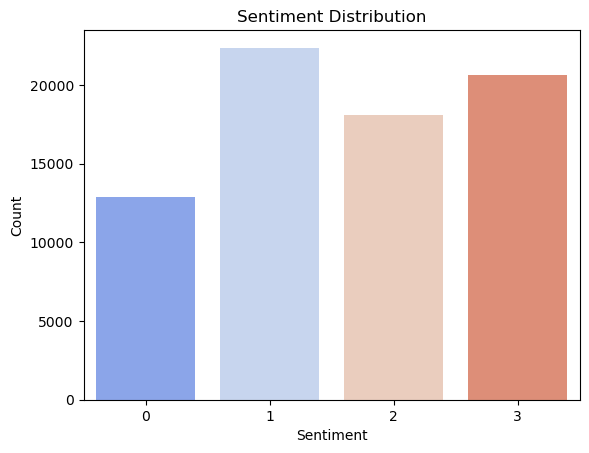

In [101]:
#Count plot of Sentiments
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Label'], palette="coolwarm")

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

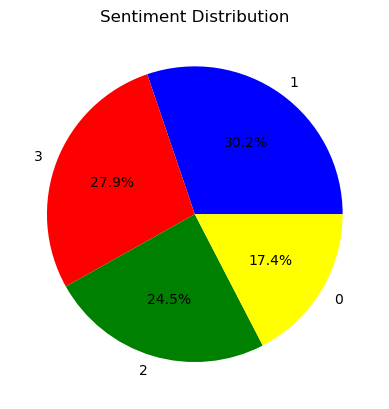

In [105]:
#Sentiment Distribution in Pie chart

df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red', 'green', 'yellow'])
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()

In [40]:
# Encodes categorical labels in the 'Label' column of a pandas DataFrame (df) into numerical values using
le_model = LabelEncoder()
df['Label'] = le_model.fit_transform(df['Label'])

In [42]:
# Viewing the first five rows
df.head(5)

,id,country,Label,Text,Preprocessed Text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder


In [44]:
# Splits the dataset into training and testing sets for machine learning
X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed Text'], df['Label'], 
                                                    test_size=0.2, random_state=42, stratify=df['Label'])

In [46]:
# Prints the shapes (dimensions) of the X_train and X_test datasets, which represent the training and testing feature data respectively.
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (59196,)
Shape of X_test:  (14800,)


## MACHINE LEARNING MODELS

In [48]:
# Create classifier
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))         
])

In [50]:
# Model training
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [52]:
# Get prediction
y_pred = clf.predict(X_test)

In [54]:
# Print score
print(accuracy_score(y_test, y_pred))

0.7322972972972973


In [56]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62      2575
           1       0.65      0.90      0.76      4472
           2       0.84      0.64      0.72      3622
           3       0.71      0.81      0.76      4131

    accuracy                           0.73     14800
   macro avg       0.79      0.70      0.71     14800
weighted avg       0.77      0.73      0.72     14800



In [58]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))         
])

In [60]:
# Model training
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', RandomForestClassifier())])

In [67]:
# Get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

In [69]:
# Print Accuracy
print(accuracy_score(y_test, y_pred))

0.9112837837837838


In [71]:
# Print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2575
           1       0.93      0.93      0.93      4472
           2       0.94      0.89      0.91      3622
           3       0.85      0.94      0.89      4131

    accuracy                           0.91     14800
   macro avg       0.92      0.91      0.91     14800
weighted avg       0.91      0.91      0.91     14800



## TEST MODEL

In [74]:
# Loading the validation dataset
test_df = pd.read_csv('twitter_validation.csv', names=columns)
test_df.head()

,id,country,Label,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [76]:
test_text = test_df['Text'][10]
print(f"{test_text} ===> {test_df['Label'][10]}")

The professional dota 2 scene is fucking exploding and I completely welcome it.

Get the garbage out. ===> Positive


In [78]:
test_text_processed = [preprocess(test_text)]
test_text_processed

['professional dota 2 scene fuck explode completely welcome \n\n garbage']

In [80]:
test_text = clf.predict(test_text_processed)

In [82]:
classes = ['Irrelevant', 'Natural', 'Negative', 'Positive']

print(f"True Label: {test_df['Label'][10]}")
print(f'Predict Label: {classes[test_text[0]]}')

True Label: Positive
Predict Label: Positive
